Importo las librerias a usar.

In [1]:
import codecs
import numpy as np
import matplotlib.pyplot as plt

Cargo los términos del archivo "words-en.txt" y guardos sus tamaños.

In [2]:
PATH_TERMINOS = "words-en.txt"

len_terminos = []

with codecs.open(PATH_TERMINOS, mode="r", encoding="utf-8") as file_terminos:
    for linea in file_terminos:
        termino = linea.strip("\n")
        if termino:
            len_terminos.append(len(termino))

Las estadísticas que se tomaron son:
- El peso total resultante de sumar las longitudes de todos los términos
- La mínima y máxima longitud de un término
- La longitud promedio y la mediana de las longitudes
- La cantidad de términos
- El peso de los términos si se almacenan como "dictionary-as-string" con 4 bytes para el df, 4 bytes para los punteros a las postings y 3 bytes para los punteros a los términos dentro del string

In [3]:
suma_len_terminos = sum(leng for leng in len_terminos)
max_len_termino = max(len_terminos)
min_len_termino = min(len_terminos)
len_termino_mediana = np.median(len_terminos)
cant_terminos = len(len_terminos)
peso_df = cant_terminos * 4
peso_punteros_pos = cant_terminos * 4
peso_punteros_ter = cant_terminos * 3
peso_dic_as_string = suma_len_terminos + peso_df + peso_punteros_pos + peso_punteros_ter
        
print u"Estadísticas"
print u"SUMA DE LOS PESOS DE LOS TÉRMINOS: " + str(suma_len_terminos / float(1024 * 1024)) + " megabytes"
print u"LONG PROMEDIO DE LOS TÉRMINOS: " + str(round(suma_len_terminos / float(cant_terminos), 2)) + " caracteres"
print u"MAX LONG DE UN TÉRMINO: " + str(max_len_termino) + " caracteres"
print u"MIN LONG DE UN TÉRMINO: " + str(min_len_termino) + " caracteres"
print u"LONG DE TÉRMINO MEDIANA: " + str(len_termino_mediana) + " caracteres"
print u"CANTIDAD DE TÉRMINOS: " + str(cant_terminos)
print u"PESO DEL DICCIONARIO: " + str(peso_dic_as_string / float(1024 * 1024)) + " megabytes"

Estadísticas
SUMA DE LOS PESOS DE LOS TÉRMINOS: 3.20195102692 megabytes
LONG PROMEDIO DE LOS TÉRMINOS: 9.46 caracteres
MAX LONG DE UN TÉRMINO: 31 caracteres
MIN LONG DE UN TÉRMINO: 1 caracteres
LONG DE TÉRMINO MEDIANA: 9.0 caracteres
CANTIDAD DE TÉRMINOS: 354935
PESO DEL DICCIONARIO: 6.92536735535 megabytes


Ahora grafico mediante un histograma la distribución de las longitudes de los términos.

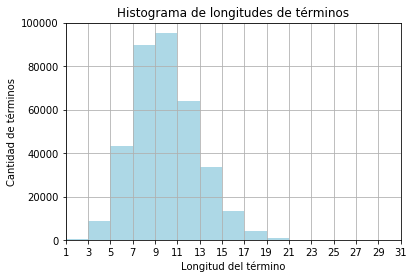

In [6]:
fig, ax = plt.subplots(1,1)
ax.hist(len_terminos, bins=max_len_termino / 2, facecolor="lightblue")
ax.set_title(u"Histograma de longitudes de términos")
ax.set_xlabel(u"Longitud del término")
ax.set_ylabel(u"Cantidad de términos")
ax.set_xlim([min_len_termino, max_len_termino])
ax.set_xticks(xrange(min_len_termino, max_len_termino + 1, 2))
ax.grid(True)
plt.show(ax)

En el caso de que se desee mantener todos los términos de la lista, el tamaño máximo de palabra recomendable seria de 20 bytes que es un valor tomando como referencia. 
Si en cambio solo se busca un tamaño mas reducido que permita mantener intactos la mayoría de los términos, descartando aquellos que excedan dicha longitud, se podría establecer un límite de entre 13 y 17 bytes.

In [7]:
cant_menor_igual_13 = sum(1 for leng in len_terminos if leng <= 13)
cant_menor_igual_17 = sum(1 for leng in len_terminos if leng <= 17)
print "PORCENTAJE MENOR O IGUAL A 13 CARACTERES: " + str(round(cant_menor_igual_13 / float(cant_terminos), 3) * 100) + "%"
print "PORCENTAJE MENOR O IGUAL A 17 CARACTERES: " + str(round(cant_menor_igual_17 / float(cant_terminos), 3) * 100) + "%"

PORCENTAJE MENOR O IGUAL A 13 CARACTERES: 90.7%
PORCENTAJE MENOR O IGUAL A 17 CARACTERES: 99.2%


De todas maneras no es conveniente usar un tamaño fijo para los términos, ya que incluso usando solo 13 caracteres, el tamaño del diccionario resulta superior.

In [8]:
tam_fijo_13 = cant_terminos * 13 + peso_punteros_pos + peso_df
tam_fijo_17 = cant_terminos * 17 + peso_punteros_pos + peso_df
print u"TAMAÑO DICCIONARIO CON BLOQUES FIJOS DE 13 BYTES: " + str(tam_fijo_13 / float(1024 * 1024)) + " megabytes"
print u"TAMAÑO DICCIONARIO CON BLOQUES FIJOS DE 17 BYTES: " + str(tam_fijo_17 / float(1024 * 1024)) + " megabytes"

TAMAÑO DICCIONARIO CON BLOQUES FIJOS DE 13 BYTES: 7.10834026337 megabytes
TAMAÑO DICCIONARIO CON BLOQUES FIJOS DE 17 BYTES: 8.46230983734 megabytes
